# **Cheching the solubility of molecule in water**

## **Load Data**

In [ ]:
import pandas as pd
df  = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


# **Data Preparation**

### **Data Separation as X and y**

In [ ]:
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [ ]:
X = df.drop(["logS"], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### **Data Spliting**

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(915, 4)

In [ ]:
X_test.shape

(229, 4)

# **Model Building**

## **Linear Regression**

### **Training The Model**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

### **Applying a model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

In [ ]:
y_lr_test_pred


array([-1.53917269, -6.08287944, -5.28375883, -3.27746087, -1.70320929,
       -5.63167711, -1.43239582, -2.74544339, -3.43274443, -3.79048137,
       -1.26884289, -1.54861269, -3.72258406, -3.25962057, -3.76344744,
       -2.13317387, -2.00365994, -4.80828381, -1.43582956, -2.81358533,
       -2.37870232, -1.45080608, -3.71048234, -3.06158669, -1.12854214,
       -1.11007232, -2.45566761, -5.0338893 , -3.29087978, -4.21832264,
       -2.45834377, -3.09200621, -3.89726792, -1.85208473, -2.17761301,
       -6.01542152, -1.06493784, -2.35071265, -1.72034021, -1.45695216,
       -1.85208473, -6.66998091, -1.23899725, -1.46015868, -1.65115215,
       -3.79048137, -4.73551134, -1.09859266, -0.69404611, -1.91048017,
       -3.16121056, -2.34753749, -2.01980335, -2.51436431, -7.04012802,
       -5.27488937, -4.18979204, -2.9647599 , -1.7364388 , -1.64388527,
       -4.60884756, -4.84900677, -0.18955927, -1.73839902, -1.63779456,
       -2.01616982, -1.46391856, -7.64117637, -1.34518182, -2.28

### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:

print("LR MSE (Train):",lr_train_mse)
print("LR R2 (Train):",lr_train_r2)
print("LR MSE (Test):",lr_test_mse)
print("LR R2 (Test):",lr_test_r2)

LR MSE (Train): 1.0139894491573003
LR R2 (Train): 0.7695127746587307
LR MSE (Test): 0.9990844407075306
LR R2 (Test): 0.7705650058569232


In [ ]:
lr_results = pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Model','Training MSE','Training R2','Testing MSE','Testing R2 ']
lr_results

,Model,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.013989,0.769513,0.999084,0.770565


## **Random Forest**

In [ ]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2,random_state=100)

### **Training The Model**

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying a model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [ ]:
y_rf_train_pred

array([-4.39406068, -7.01386075, -4.1790564 , -1.17794119, -2.2850991 ,
       -1.33950462, -1.25181203, -2.66705519, -2.65236412, -2.31264491,
       -4.1790564 , -7.01386075, -4.06327457, -1.33950462, -2.62909993,
       -1.17794119, -2.68110568, -4.39406068, -1.48786212, -5.44303134,
       -1.36708347, -4.39406068, -5.41614062, -1.48334237, -4.33728987,
       -4.09424671, -2.68110568, -2.48465432, -2.48465432, -4.3016489 ,
       -1.35145256, -2.68110568, -2.29709247, -7.01386075, -1.51301599,
       -4.33728987, -2.65236412, -2.66705519, -1.52706648, -4.09424671,
       -2.66705519, -4.39406068, -1.36550305, -4.39406068, -3.60378319,
       -2.65236412, -4.39406068, -4.39406068, -1.35145256, -2.68110568,
       -5.44303134, -3.50229491, -2.66705519, -2.66705519, -1.36550305,
       -2.65236412, -7.01386075, -2.68110568, -1.36550305, -4.09424671,
       -4.21302627, -1.17794119, -2.68110568, -1.35145256, -4.1790564 ,
       -1.51301599, -1.36550305, -7.01386075, -6.90556761, -3.70

In [ ]:
y_rf_test_pred

array([-1.33950462, -6.98577329, -4.39406068, -2.62909993, -1.35145256,
       -5.44303134, -1.35145256, -4.1790564 , -2.47266096, -4.33728987,
       -1.36550305, -1.35145256, -2.68110568, -2.8547836 , -3.70848106,
       -1.48334237, -2.49354382, -4.39406068, -1.25181203, -2.66705519,
       -2.49354382, -1.35145256, -4.39406068, -3.52046149, -1.17794119,
       -1.17794119, -2.49354382, -5.44303134, -2.62909993, -4.1790564 ,
       -1.48334237, -2.68110568, -4.37313972, -1.69041032, -2.66705519,
       -7.01386075, -1.17794119, -2.47146521, -2.29709247, -1.64276102,
       -1.69041032, -7.01386075, -1.36550305, -1.30996483, -2.29709247,
       -4.33728987, -4.09424671, -1.36550305, -1.17794119, -1.38179394,
       -3.60378319, -2.66705519, -1.36550305, -1.52706648, -7.01386075,
       -5.46984259, -4.07753611, -3.70848106, -1.25253761, -1.36550305,
       -4.39406068, -4.39406068, -1.17794119, -1.33950462, -2.29709247,
       -1.48347619, -1.36550305, -7.01386075, -1.36550305, -1.39

### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Model','Training MSE','Training R2','Testing MSE','Testing R2 ']
rf_results

,Model,Training MSE,Training R2,Testing MSE,Testing R2
0,Random Forest,1.057186,0.759694,1.05209,0.758393


## **Model Compression**

In [ ]:
df_models = pd.concat([lr_results, rf_results], ignore_index=True , axis = 0)
df_models

,Model,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.013989,0.769513,0.999084,0.770565
1,Random Forest,1.057186,0.759694,1.05209,0.758393


## **Data Visualization of prediction Result**

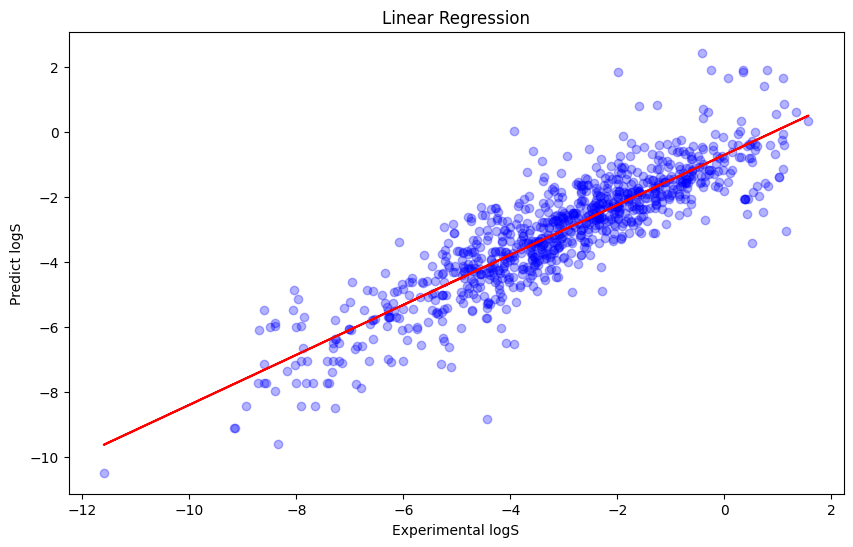

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_lr_train_pred, color='blue', alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), color='red')
plt.xlabel('Experimental logS')
plt.ylabel('Predict logS')
plt.title('Linear Regression')

plt.show()
